# 1. Business Understanding

InsurTech companies are addressing the
the topic of modernizing the insurance industry. The aim is to make
insurance companies cheaper, more appealing, "more efficient" through modern
"insurance models, digitalized processes, new consulting and
management methods" are to be designed. The increasing challenges make it more difficult for insurers to compete and survive in the market. Composed of adaptive customer demands, "digitalization, stricter regulation and bureaucracy", insurers are clearly put to the test with the aspect of economic results. At the same moment, opportunities arise in the business model that are still
remain untapped. One of these models is the principle of cross-selling. For this model to be implemented, the
the opinion of existing customers is essential. The business model should be based on anticipated on the basis of the existing interest of the customer. The analysis is intended to show the insurer what potential is actually available and in what amount. The analysis will address the question of whether there are customers who are interested in car insurance. The answer to this question should also simultaneously provide a representation of the level of interest. Thus, an assessment can be made as to whether actively approaching customers is worthwhile at all.

# 2. Data and Data Understanding

The dataset is called Janatahack Cross-sell Prediction and was split into a training and a test dataset. The attribute "Response" is the target variable and expresses a customer's interest in car insurance. However, since this important column is curiously missing from the test data set, only the training data set was used for the model. This was therefore used for training and testing. The data set consists of 12 columns and 381109 rows. Each row represents one person.

## 2.1. Import of Relevant Modules

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
sns.set()
import warnings
warnings.filterwarnings('ignore')
# Zusätzlich für Logistische Regression benötigt:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

## 2.2. Read Data

In [2]:
# Upload data
raw_data = pd.read_csv('https://storage.googleapis.com/ml-service-repository-datastorage/Prediction_Interest_for_car_insurance_data.csv')

At the beginning, an overview of the data is provided. Only the first 5 data entries or lines are considered.

In [3]:
# print first 5 rows of the dataframe
raw_data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


Now that the initial overview of the data is apparent, let's look at the data types of the individual columns.

In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


The data types match the indicated columns. The danger of producing NULL values is not present. Therefore no correction is necessary.

## 2.3. Data cleaning

First, all empty cells from the data set are summed, in which range with which total number of variables are missing.

In [5]:
raw_data.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

No NULL values are given. Therefore, neither replacement by synthetic data nor deletion of specific rows is needed.

After the table has been checked for NULL values, the check for duplicates follows.

In [6]:
raw_data[raw_data.duplicated(keep=False)]

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response


Again, no duplicates were detected.

## 2.4. Descriptive Analytics

After checking for NULL values and duplicates, descriptive statistics are now applied to the data. This should give the first impression of how the data is structured at the moment.

In [7]:
raw_data.describe(include='all')

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109,381109.000000,381109.000000,381109.000000,381109.000000,381109,381109,381109.000000,381109.000000,381109.000000,381109.000000
unique,NaN,2,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,1-2 Year,Yes,NaN,NaN,NaN,NaN
freq,NaN,206089,NaN,NaN,NaN,NaN,200316,192413,NaN,NaN,NaN,NaN
mean,190555.000000,NaN,38.822584,0.997869,26.388807,0.458210,NaN,NaN,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,NaN,15.511611,0.046110,13.229888,0.498251,NaN,NaN,17213.155057,54.203995,83.671304,0.327936
min,1.000000,NaN,20.000000,0.000000,0.000000,0.000000,NaN,NaN,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,NaN,25.000000,1.000000,15.000000,0.000000,NaN,NaN,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,NaN,36.000000,1.000000,28.000000,0.000000,NaN,NaN,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,NaN,49.000000,1.000000,35.000000,1.000000,NaN,NaN,39400.000000,152.000000,227.000000,0.000000


After analyzing the descriptive statistics, the Annual_Premium column stands out. The average (mean) shows a value of 30564.389581. The conspicuous feature here is the maximum value of 540165, which clearly stands out. This already indicates an outlier in the maximum value. 

The data set consists of 381109 rows, one row each describing the customer and 12 columns describing the customer's attributes. This data is used to try to classify whether a customer is interested in additional car insurance or not. For this purpose, the historical data contains the target variable "Response", which provides information about whether a customer is interested.  

### 2.4.1. Numeric attributes

We start with the numerical attributes. First, the distributions of the numerical attributes are examined individually and in a second step the categorical attributes are related to the target variable.

In [8]:
# upload all numeric attributes
numeric_data = raw_data.select_dtypes(include=[np.number])

### Age

<AxesSubplot:xlabel='Age', ylabel='Density'>

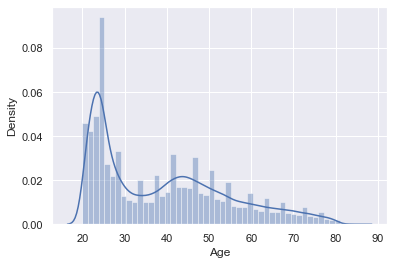

In [9]:
sns.distplot(numeric_data["Age"])

- The majority of customers are between 20 and 30 years old
- The curve flattens strongly towards the back
- Questionable whether there are outliers in the back part --> Apply boxplot

<AxesSubplot:xlabel='Age', ylabel='Density'>

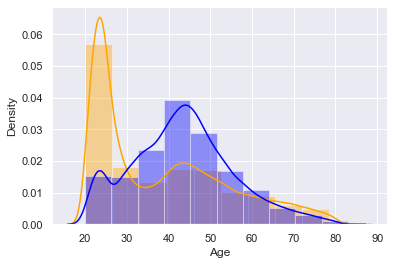

In [10]:
sns.distplot(raw_data[raw_data.Response == 0]["Age"],
             bins=10,
             color='orange',
             label='No',
             kde=True)
sns.distplot(raw_data[raw_data.Response == 1]["Age"],
             bins=10,
             color='blue',
             label='Yes',
             kde=True)

- Customers between the ages of 20 to 30 tend to have rather no interest in taking out additional insurance.
- Customers aged between 35 and 55 have the highest level of interest. 

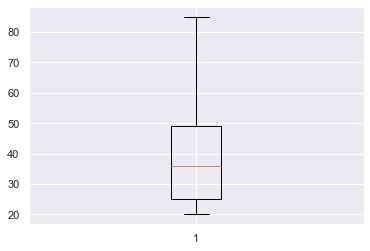

In [11]:
plt.boxplot(numeric_data["Age"])
plt.show()

With the help of the box plot, it was possible to ensure that no outliers could be found. If outliers were to appear, they would appear as dots above the orange line.

### Driving License

<AxesSubplot:xlabel='Driving_License', ylabel='Density'>

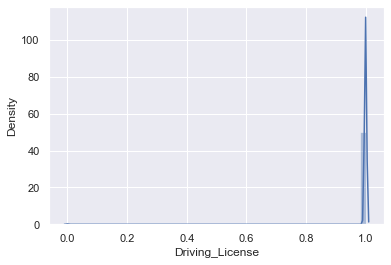

In [12]:
sns.distplot(numeric_data["Driving_License"])

- Column consists only of 0 and 1
- A large proportion of customers have a driver's license
- The bar chart can be used to illustrate a clearer representation.

### Region Code

<AxesSubplot:xlabel='Region_Code', ylabel='Density'>

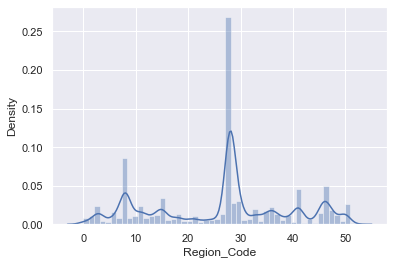

In [13]:
sns.distplot(numeric_data["Region_Code"])

- All regions are marked with a number
- The region code denotes a unique code for a specific region

<AxesSubplot:xlabel='Region_Code', ylabel='Density'>

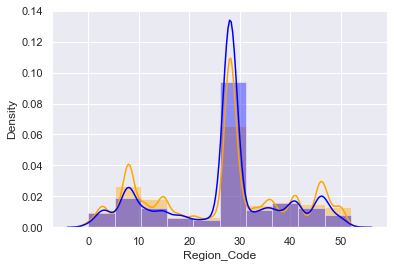

In [14]:
sns.distplot(raw_data[raw_data.Response == 0]["Region_Code"],
             bins=10,
             color='orange',
             label='No',
             kde=True)
sns.distplot(raw_data[raw_data.Response == 1]["Region_Code"],
             bins=10,
             color='blue',
             label='Yes',
             kde=True)

- The majority of customers are resident between 25 and 30.
- Customers from regions with the code between 25 and 30 have a great interest in additional insurance.
- Customers from regions with the code between 5 and 10 are not very interested in additional insurance.

### Previously_Insured

<AxesSubplot:xlabel='Previously_Insured', ylabel='Density'>

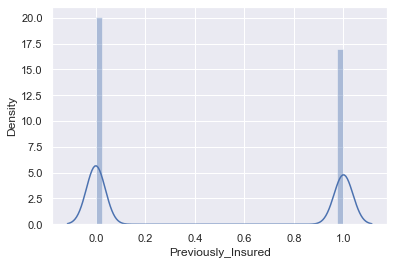

In [15]:
sns.distplot(numeric_data["Previously_Insured"])

- Categorical attribute, since 1 represents a 'Yes' and 0 a 'No' response.

<AxesSubplot:xlabel='Previously_Insured', ylabel='Density'>

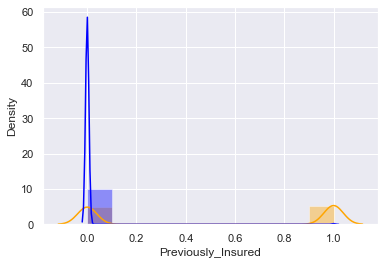

In [16]:
sns.distplot(raw_data[raw_data.Response == 0]["Previously_Insured"],
             bins=10,
             color='orange',
             label='No',
             kde=True)
sns.distplot(raw_data[raw_data.Response == 1]["Previously_Insured"],
             bins=10,
             color='blue',
             label='Yes',
             kde=True)

- Customers who already have car insurance tend not to show interest in the additional offer.

### Annual Premium

<AxesSubplot:xlabel='Annual_Premium', ylabel='Density'>

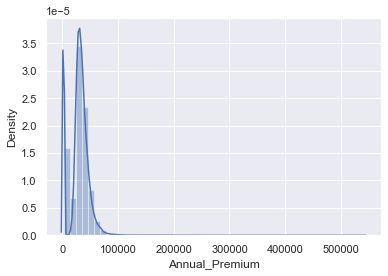

In [17]:
sns.distplot(numeric_data["Annual_Premium"])

- Normal distribution recognizable
- Outlier recognizable, curve flattens extremely strongly to the right
- The cost range that a customer pays for a premium membership is between 0 and 100000.

<AxesSubplot:xlabel='Annual_Premium', ylabel='Density'>

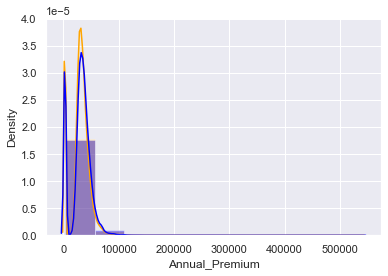

In [18]:
sns.distplot(raw_data[raw_data.Response == 0]["Annual_Premium"],
             bins=10,
             color='orange',
             label='No',
             kde=True)
sns.distplot(raw_data[raw_data.Response == 1]["Annual_Premium"],
             bins=10,
             color='blue',
             label='Yes',
             kde=True)

### Policy_Sales_Channel

<AxesSubplot:xlabel='Policy_Sales_Channel', ylabel='Density'>

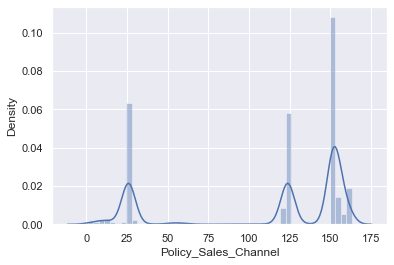

In [19]:
sns.distplot(numeric_data["Policy_Sales_Channel"])

- Policy Sales Channel is the choice of the channel through which the customer is reached (e.g. by phone).
- Code 150 is the channel with the highest customer reach

<AxesSubplot:xlabel='Policy_Sales_Channel', ylabel='Density'>

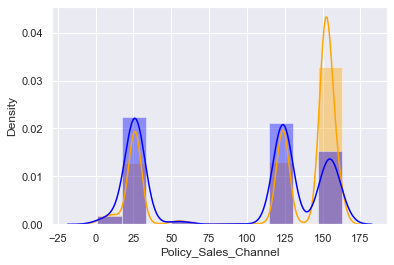

In [20]:
sns.distplot(raw_data[raw_data.Response == 0]["Policy_Sales_Channel"],
             bins=10,
             color='orange',
             label='No',
             kde=True)
sns.distplot(raw_data[raw_data.Response == 1]["Policy_Sales_Channel"],
             bins=10,
             color='blue',
             label='Yes',
             kde=True)

- The customers with the greatest interest in additional car insurance are reached via channels 25 and 125.

### Vintage

<AxesSubplot:xlabel='Vintage', ylabel='Density'>

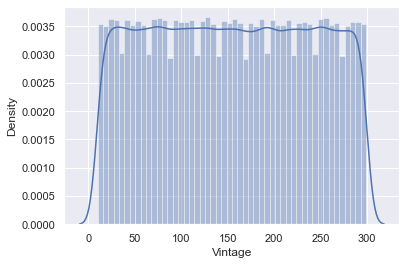

In [21]:
sns.distplot(numeric_data["Vintage"])

- No normal distribution recognizable
- No outliers recognizable
- Customers are potentially evenly distributed over the individual days.

<AxesSubplot:xlabel='Vintage', ylabel='Density'>

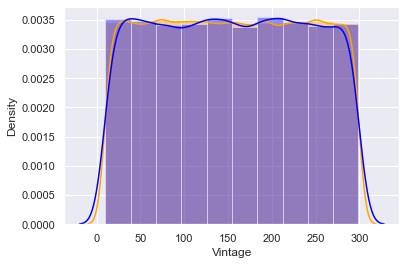

In [22]:
sns.distplot(raw_data[raw_data.Response == 0]["Vintage"],
             bins=10,
             color='orange',
             label='No',
             kde=True)
sns.distplot(raw_data[raw_data.Response == 1]["Vintage"],
             bins=10,
             color='blue',
             label='Yes',
             kde=True)

- Even distribution
- No trend for interest apparent.

### Response

<AxesSubplot:xlabel='Response', ylabel='Density'>

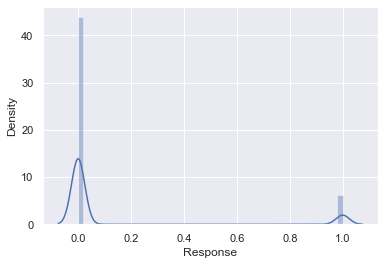

In [23]:
sns.distplot(numeric_data["Response"])

- Categorical variable available as numeric variable (0 and 1 only).
- 1 stands for interest, 0 stands for no interest
- A large proportion of customers have no interest in further insurance

### Correlation matrix of the numerical variables

<AxesSubplot:>

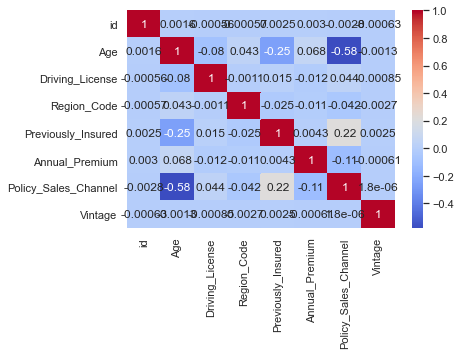

In [24]:
feature_corr = numeric_data.drop("Response", axis=1).corr()
sns.heatmap(feature_corr, annot=True, cmap='coolwarm')

The matrix does not show any conspicuously strong correlations. The correlations Previously_Insured/Policy_Sales_Channel and Age/Annual_Premium are moderately correlated.

## 2.4.2 Categorical attributes

In the following, the categorical attributes are examined. Again, the attributes should be related to the target variable. From the previous chapter numerical attributes were determined, which contain categorical attributes (e.g. Response). These are also considered in this analysis.

###  Response (target)

First, the distribution of the target variable "Response" is checked.

Text(0.5, 1.0, 'Interest in car insurance vs. no interest')

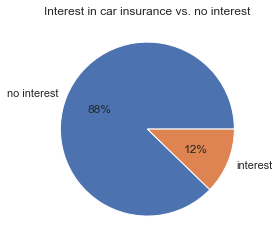

In [25]:
# Generate pie chart for response
# Generate percentages
response_rate = numeric_data.Response.value_counts() / len(numeric_data.Response)

# Prepare plot
labels = 'no interest', 'interest'
fig, ax = plt.subplots()
ax.pie(response_rate, labels=labels, autopct='%.f%%')  
ax.set_title('Interest in car insurance vs. no interest')

- Interest in car insurance corresponds to about 12% of the total data set, while lack of interest corresponds to about 88%.
- Thus, this is an unbalanced data set and another metric must be used in the evaluation phase.

### Gender

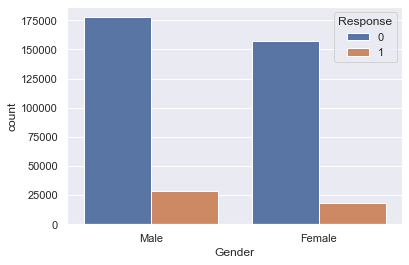

In [26]:
sns.countplot(x="Gender", hue="Response", data=raw_data)
plt.show()

- 0 = "No interest", 1 = "Interest".
- The interest between the sexes is almost equal.

### Vehicle_Age

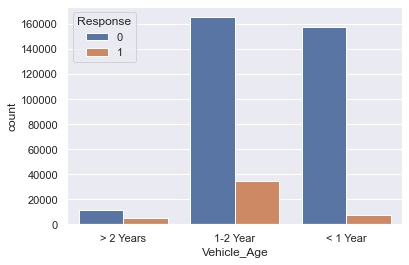

In [27]:
sns.countplot(x="Vehicle_Age", hue="Response", data=raw_data)
plt.show()

- Looking at the ratio of the graph, it is recognized that the greatest interest is among vehicle owners whose car is older than 2 years.

### Vehicle_Damage

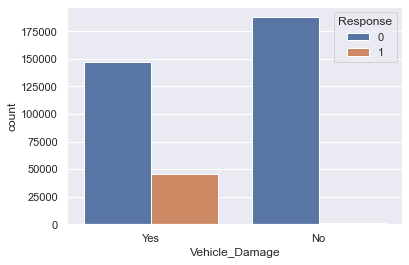

In [28]:
sns.countplot(x="Vehicle_Damage", hue="Response", data=raw_data)
plt.show()

- The graph shows that motor vehicle owners whose car has already been damaged are more interested in motor vehicle insurance.
- By contrast, owners of accident-free vehicles are not interested in an offer at all.

# 3. Data Preperation

## 3.1 Reduce customer ID

At the beginning, the column "id" can already be deleted. An identification number to estimate the interest of a customer group is not necessary. Therefore this can be removed directly

In [29]:
# delete customer id 
data_prep1 = raw_data.drop("id", axis = 1)

## 3.2 Coding of numeric Variables

In the data set, it was found that certain columns consist only of the numeric variables 0 and 1. Since these are categories (1 = Yes, 0 = No), the numeric variable must be converted to a categorical variable for a new data overview. The map() function is used for this purpose.

In [30]:
# Conversion of numeric variables into categorical variables
bin_var = ["Driving_License","Previously_Insured","Response"]

In [31]:
# Creation of the "categorical_convert" functoin to reference the numeric variables to categorical attributes.
def kategorisch_umwandeln(x):
    return x.map({1:'Yes',0:'No'})

In [32]:
# Calling the "data_prep" table and adjusting the defined columns
data_prep1[bin_var]=data_prep1[bin_var].apply(kategorisch_umwandeln)
# View of the newly created table
data_prep1.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,Yes,28.0,No,> 2 Years,Yes,40454.0,26.0,217,Yes
1,Male,76,Yes,3.0,No,1-2 Year,No,33536.0,26.0,183,No
2,Male,47,Yes,28.0,No,> 2 Years,Yes,38294.0,26.0,27,Yes
3,Male,21,Yes,11.0,Yes,< 1 Year,No,28619.0,152.0,203,No
4,Female,29,Yes,41.0,Yes,< 1 Year,No,27496.0,152.0,39,No


## 3.2 Handling outliers

<AxesSubplot:xlabel='Annual_Premium', ylabel='Density'>

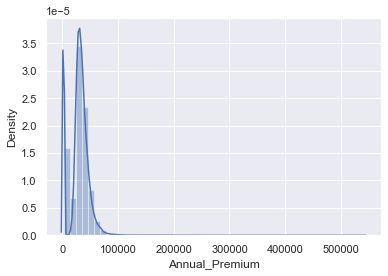

In [33]:
sns.distplot(numeric_data["Annual_Premium"])

In [34]:
# Deletion of 1 % of the maximum value
q = data_prep1['Annual_Premium'].quantile(0.99)
data_1 = data_prep1[data_prep1['Annual_Premium']<q]

<AxesSubplot:xlabel='Annual_Premium', ylabel='Density'>

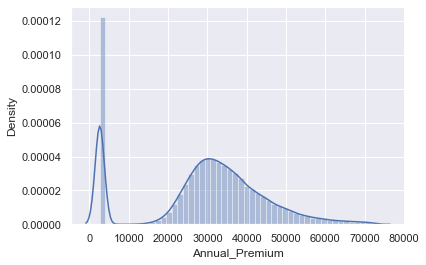

In [35]:
# Output corrected distribution function
sns.distplot(data_1["Annual_Premium"])

- Subsequently, 1% are removed from the left, since many values point to 0.
- Costs of 0 are possible therefore, since also many customers can have over an offer of a one-year, free membership.

In [36]:
q = data_1['Annual_Premium'].quantile(0.01)
data_2 = data_1[data_1['Annual_Premium']>q]

<AxesSubplot:xlabel='Annual_Premium', ylabel='Density'>

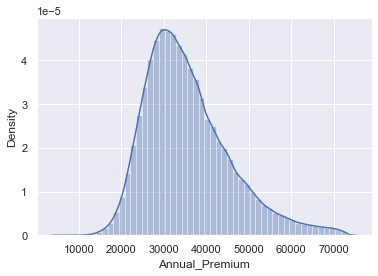

In [37]:
# Output corrected distribution function
sns.distplot(data_2["Annual_Premium"])

 Distribution function is recognizable
- The majority of customers pay 30,000.00 per year for subscription.

## 3.3 Consideration of the new Response, Driving License, and Previously Insured categorical attributes

Text(0.5, 1.0, 'Interest in car insurance vs. no interest')

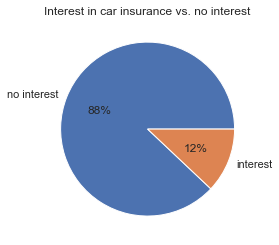

In [38]:
response_rate = data_2.Response.value_counts() / len(data_2.Response)

# Prepare plot
labels = 'no interest', 'interest'
fig, ax = plt.subplots()
ax.pie(response_rate, labels=labels, autopct='%.f%%')  
ax.set_title('Interest in car insurance vs. no interest')

The bar chart of "Driving_License" is now considered.

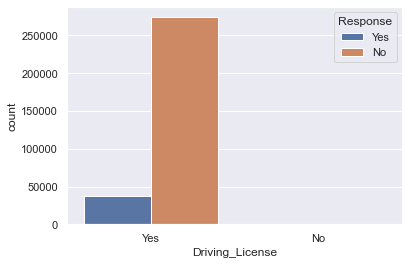

In [39]:
sns.countplot(x="Driving_License", hue="Response", data=data_2)
plt.show()

From this graph, it can be seen that only customers who also have a driver's license are of interest.

In the following chart, we look at customers who already have insurance.

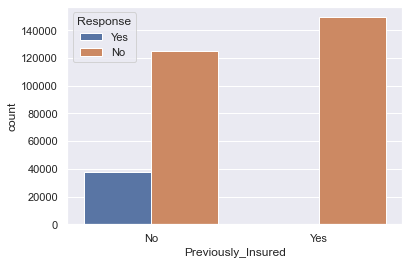

In [40]:
sns.countplot(x="Previously_Insured", hue="Response", data=data_2)
plt.show()

The graph expresses that customers who are already insured have no interest in additional insurance.

### Re-examination of the correlation matrix

In [41]:
# upload all numeric attributes
numeric_data = data_2.select_dtypes(include=[np.number])

<AxesSubplot:>

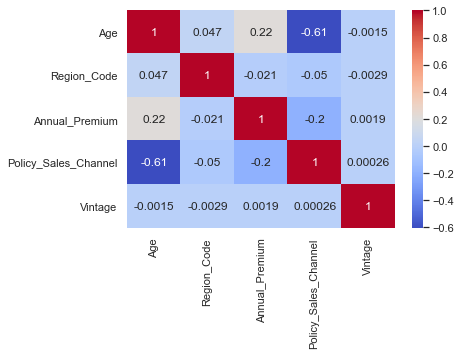

In [42]:
feature_corr = numeric_data.corr()
sns.heatmap(feature_corr, annot=True, cmap='coolwarm')

- With the renewed view, moderately strong correlations are now examined.
- No strong correlations present.

## 3.4 Test for linearity

Now the linearity is checked. Vintage is added as a new explanatory variable. We want to compare the length of the tie to the company with other variables.

<AxesSubplot:xlabel='Vintage', ylabel='Annual_Premium'>

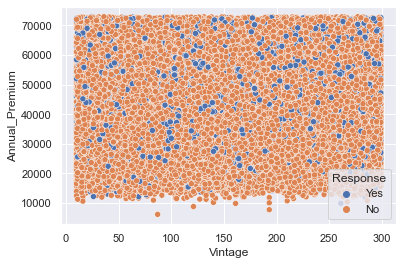

In [43]:
sns.scatterplot(data=data_2, x="Vintage", y="Annual_Premium", hue="Response")

- No linearity
- Seems to notice that customers who have been with the company longer and have high costs have a higher interest in supplementary insurance (indicates wealthy individuals)

<AxesSubplot:xlabel='Vintage', ylabel='Age'>

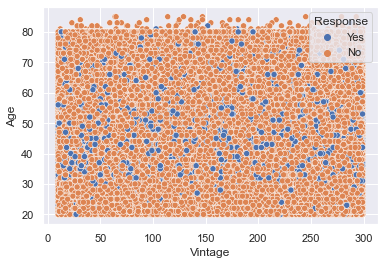

In [44]:
sns.scatterplot(data=data_2, x="Vintage", y="Age", hue="Response")

It can be seen here that customers between the ages of 30 and 50 maintain a higher level of interest. Above all, customers who have been with the company between 0 and 100 days seem to be interested. Here, too, no linearity can be discerned.

<AxesSubplot:xlabel='Vintage', ylabel='Policy_Sales_Channel'>

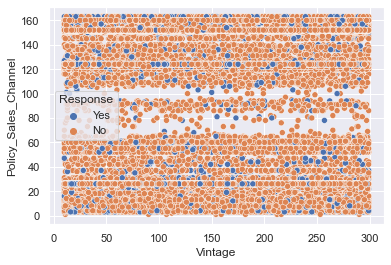

In [45]:
sns.scatterplot(data=data_2, x="Vintage", y="Policy_Sales_Channel", hue="Response")

- No linearity
- Customers reached via sales channel 40 and 120 have significantly higher interest. For sales channel 40, a blue mass can be seen in the range between 200 and 300.

<AxesSubplot:xlabel='Vintage', ylabel='Region_Code'>

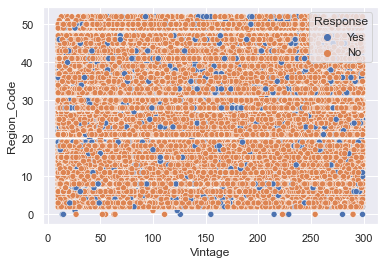

In [46]:
sns.scatterplot(data=data_2, x="Vintage", y="Region_Code", hue="Response")

- No linearity discernible
- Regions between 30 and 40 with affiliation between 100 and 200 days, are more often interested

A logarithmization is then performed to see if a closer linearity can be created. This was a test run and did not describe linearity in the following.

In [47]:
# create table for testing
newTest = data_2.copy()
# generate values
log_vintage = np.log(newTest['Vintage'])
# add column in newTest
newTest['log_vintage'] = log_vintage
# show table
newTest.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,log_vintage
0,Male,44,Yes,28.0,No,> 2 Years,Yes,40454.0,26.0,217,Yes,5.379897
1,Male,76,Yes,3.0,No,1-2 Year,No,33536.0,26.0,183,No,5.209486
2,Male,47,Yes,28.0,No,> 2 Years,Yes,38294.0,26.0,27,Yes,3.295837
3,Male,21,Yes,11.0,Yes,< 1 Year,No,28619.0,152.0,203,No,5.313206
4,Female,29,Yes,41.0,Yes,< 1 Year,No,27496.0,152.0,39,No,3.663562


<AxesSubplot:xlabel='log_vintage', ylabel='Age'>

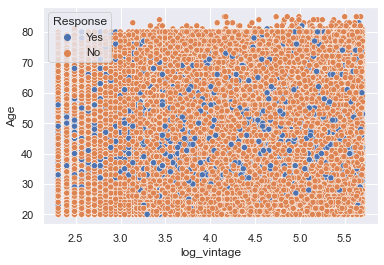

In [48]:
sns.scatterplot(data=newTest, x="log_vintage", y="Age", hue="Response")

<AxesSubplot:xlabel='log_vintage', ylabel='Annual_Premium'>

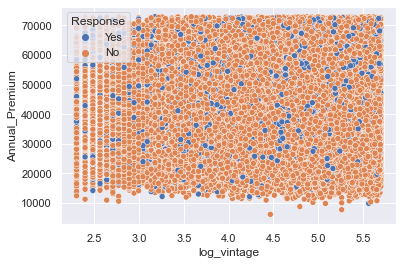

In [49]:
sns.scatterplot(data=newTest, x="log_vintage", y="Annual_Premium", hue="Response")

<AxesSubplot:xlabel='log_vintage', ylabel='Policy_Sales_Channel'>

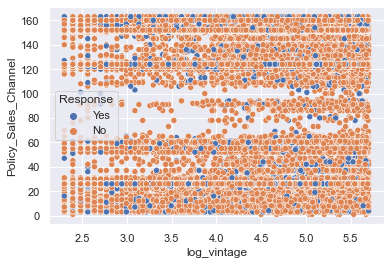

In [50]:
sns.scatterplot(data=newTest, x="log_vintage", y="Policy_Sales_Channel", hue="Response")

<AxesSubplot:xlabel='log_vintage', ylabel='Region_Code'>

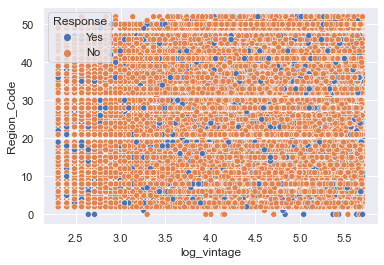

In [51]:
sns.scatterplot(data=newTest, x="log_vintage", y="Region_Code", hue="Response")

## 3.5 Index Reset

After the outliers have been removed, a new table / index is to be created to clean up the removed values from the table. With drop=True these are finally reset to a new index, removing the old index.

In [52]:
# safe data_2 as NewDataframeName
NewDataframeName = data_2.reset_index(drop = True)
#  show new descriptive statistic of NewDataframeName
NewDataframeName.describe(include='all')

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,312419,312419.000000,312419,312419.00000,312419,312419,312419,312419.000000,312419.000000,312419.000000,312419
unique,2,NaN,2,NaN,2,3,2,NaN,NaN,NaN,2
top,Male,NaN,Yes,NaN,No,1-2 Year,No,NaN,NaN,NaN,No
freq,167009,NaN,311745,NaN,162899,156656,160072,NaN,NaN,NaN,274776
mean,NaN,38.318009,NaN,26.44119,NaN,NaN,NaN,35572.496465,111.836918,154.257916,NaN
std,NaN,15.572843,NaN,12.92607,NaN,NaN,NaN,10001.929798,53.874091,83.672545,NaN
min,NaN,20.000000,NaN,0.00000,NaN,NaN,NaN,6098.000000,1.000000,10.000000,NaN
25%,NaN,24.000000,NaN,15.00000,NaN,NaN,NaN,28418.000000,29.000000,82.000000,NaN
50%,NaN,35.000000,NaN,28.00000,NaN,NaN,NaN,33844.000000,125.000000,154.000000,NaN
75%,NaN,49.000000,NaN,35.00000,NaN,NaN,NaN,40984.000000,152.000000,227.000000,NaN


## 3.6 Recoding of categorical Variables

For the further procedure of checking multicolinearity, coding on numerical attributes is performed.

In [53]:
# Convert binary variables to 1 and 0 with Yes and No
bin_var = ["Driving_License","Previously_Insured","Response"]

In [54]:
def binaer_umwandeln(x):
    return x.map({'Yes':1,'No':0})

In [55]:
NewDataframeName[bin_var]=NewDataframeName[bin_var].apply(binaer_umwandeln)
NewDataframeName.head()
NewDataframeName.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312419 entries, 0 to 312418
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                312419 non-null  object 
 1   Age                   312419 non-null  int64  
 2   Driving_License       312419 non-null  int64  
 3   Region_Code           312419 non-null  float64
 4   Previously_Insured    312419 non-null  int64  
 5   Vehicle_Age           312419 non-null  object 
 6   Vehicle_Damage        312419 non-null  object 
 7   Annual_Premium        312419 non-null  float64
 8   Policy_Sales_Channel  312419 non-null  float64
 9   Vintage               312419 non-null  int64  
 10  Response              312419 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 26.2+ MB


In [56]:
# create dummy-variables
data_enc = pd.get_dummies(NewDataframeName, drop_first=True)
data_enc.head()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Male,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
0,44,1,28.0,0,40454.0,26.0,217,1,1,0,1,1
1,76,1,3.0,0,33536.0,26.0,183,0,1,0,0,0
2,47,1,28.0,0,38294.0,26.0,27,1,1,0,1,1
3,21,1,11.0,1,28619.0,152.0,203,0,1,1,0,0
4,29,1,41.0,1,27496.0,152.0,39,0,0,1,0,0


In [57]:
data_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312419 entries, 0 to 312418
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Age                    312419 non-null  int64  
 1   Driving_License        312419 non-null  int64  
 2   Region_Code            312419 non-null  float64
 3   Previously_Insured     312419 non-null  int64  
 4   Annual_Premium         312419 non-null  float64
 5   Policy_Sales_Channel   312419 non-null  float64
 6   Vintage                312419 non-null  int64  
 7   Response               312419 non-null  int64  
 8   Gender_Male            312419 non-null  uint8  
 9   Vehicle_Age_< 1 Year   312419 non-null  uint8  
 10  Vehicle_Age_> 2 Years  312419 non-null  uint8  
 11  Vehicle_Damage_Yes     312419 non-null  uint8  
dtypes: float64(3), int64(5), uint8(4)
memory usage: 20.3 MB


In the renewed view, no objects are now displayed, the conversion to dummy variables has been completed.

## 3.7 Test for Multicollinearity

In order to ensure correct operation of the later regression, there must be no multicollinearity between the variables. The presence of the same is checked with the help of the library Statsmodel.

In [58]:
# independent variables
vif_test = data_enc.drop("Response", axis=1)
  
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = vif_test.columns 
  
# VIF for each Feature 
vif_data["VIF"] = [variance_inflation_factor(vif_test.values, i) 
                          for i in range(len(vif_test.columns))] 
  
print(vif_data)

                  feature        VIF
0                     Age  19.804783
1         Driving_License  62.984075
2             Region_Code   5.164535
3      Previously_Insured   6.556592
4          Annual_Premium  14.201152
5    Policy_Sales_Channel   9.017606
6                 Vintage   4.371791
7             Gender_Male   2.211746
8    Vehicle_Age_< 1 Year   5.939466
9   Vehicle_Age_> 2 Years   1.133583
10     Vehicle_Damage_Yes   6.709365


Driving_License has the highest VIF and is removed from the dataset.

In [59]:
data_enc.drop("Driving_License", axis=1, inplace=True)

In [60]:

  
# unabhängige Variablen
vif_test = data_enc.drop("Response", axis=1)
  
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = vif_test.columns 
  
# VIF für jedes Feature 
vif_data["VIF"] = [variance_inflation_factor(vif_test.values, i) 
                          for i in range(len(vif_test.columns))] 
  
print(vif_data)

                 feature        VIF
0                    Age  12.623381
1            Region_Code   4.864616
2     Previously_Insured   5.866290
3         Annual_Premium  12.116569
4   Policy_Sales_Channel   7.628331
5                Vintage   4.201412
6            Gender_Male   2.182362
7   Vehicle_Age_< 1 Year   4.934602
8  Vehicle_Age_> 2 Years   1.128678
9     Vehicle_Damage_Yes   5.795290


Age has high multicollinearity (VIF>10) and, as a result, is also removed.

In [66]:
data_enc.drop("Age", axis=1, inplace=True)

KeyError: "['Age'] not found in axis"

In [65]:

# unabhängige Variablen
vif_test = data_enc.drop("Response", axis=1)
  
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = vif_test.columns 
  
# VIF für jedes Feature 
vif_data["VIF"] = [variance_inflation_factor(vif_test.values, i) 
                          for i in range(len(vif_test.columns))] 
  
print(vif_data)

                 feature       VIF
0            Region_Code  4.593110
1     Previously_Insured  5.080591
2         Annual_Premium  9.093076
3   Policy_Sales_Channel  7.576390
4                Vintage  4.058008
5            Gender_Male  2.143373
6   Vehicle_Age_< 1 Year  3.376007
7  Vehicle_Age_> 2 Years  1.118402
8     Vehicle_Damage_Yes  5.107305


None of the variables now has a VIF greater than 10.

## 3.8 Feature Scaling

In [67]:
y = data_enc["Response"]
X = data_enc.drop(labels = ["Response"], axis = 1)

In [68]:
# scaling the variables

num_features = ['Vintage', 'Region_Code', 'Annual_Premium', 'Policy_Sales_Channel']

scaler = StandardScaler()

X[num_features] = scaler.fit_transform(X[num_features])
X.head()

,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Gender_Male,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
0,0.120594,0,0.488057,-1.59329,0.749854,1,0,1,1
1,-1.813484,0,-0.203611,-1.59329,0.343507,1,0,0,0
2,0.120594,0,0.272098,-1.59329,-1.520907,1,0,1,1
3,-1.194579,1,-0.695217,0.74550,0.582535,1,1,0,0
4,1.126316,1,-0.807495,0.74550,-1.377490,0,1,0,0


## 3.9 Create Test and Training Data

In [69]:
# Split data into test and training data set
# The default value of 80% to 20% is used

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=110)

## 4. Modelling and Evaluation

The modeling was done with the help of the Jupyter notebook "E11_Churn_Solution". The interpretations were made individually.

## 4.1 Logistic Regression

Logistic regression is a non-linear model. It works with categorical target values (dependent variable). It is used to predict "yes"/"no" (0/1) decisions.

### 4.1.1 Training and Prediction

In [71]:
# add constant
X_const = sm.add_constant(X_train)
# create model
log_reg = sm.Logit(y_train, X_const).fit() 
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.269500
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:               Response   No. Observations:               234314
Model:                          Logit   Df Residuals:                   234304
Method:                           MLE   Df Model:                            9
Date:                Fri, 05 Nov 2021   Pseudo R-squ.:                  0.2666
Time:                        15:08:20   Log-Likelihood:                -63148.
converged:                       True   LL-Null:                       -86106.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -3.1757      0.049    -65.161      0.000      -3.271      -3

The trained model has statistically non-significant variables. This is given if the value P>|z| is greater than 0.05 and it is not the constant. The statistically not relevant features are removed. 

In [72]:
# Removing the statistically non-significant features (P>|z|> 0.05)
insignificant_features = ["Region_Code","Vintage"]
X_train.drop(insignificant_features, axis=1, inplace=True)
X_test.drop(insignificant_features, axis=1, inplace=True)

Create a second model:

In [73]:
# New model
X_const = sm.add_constant(X_train)
log_reg2 = sm.Logit(y_train, X_const).fit() 
print(log_reg2.summary())

Optimization terminated successfully.
         Current function value: 0.269504
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:               Response   No. Observations:               234314
Model:                          Logit   Df Residuals:                   234306
Method:                           MLE   Df Model:                            7
Date:                Fri, 05 Nov 2021   Pseudo R-squ.:                  0.2666
Time:                        15:09:13   Log-Likelihood:                -63149.
converged:                       True   LL-Null:                       -86106.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -3.1759      0.049    -65.166      0.000      -3.271      -3

No more statistically insignificant variables. The final model was modeled:

In [75]:
# final model
X_const = sm.add_constant(X_train)
log_reg_final = sm.Logit(y_train, X_const).fit() 
print(log_reg_final.summary())

Optimization terminated successfully.
         Current function value: 0.269504
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:               Response   No. Observations:               234314
Model:                          Logit   Df Residuals:                   234306
Method:                           MLE   Df Model:                            7
Date:                Fri, 05 Nov 2021   Pseudo R-squ.:                  0.2666
Time:                        15:10:06   Log-Likelihood:                -63149.
converged:                       True   LL-Null:                       -86106.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -3.1759      0.049    -65.166      0.000      -3.271      -3

In [76]:
# Prediction
y_hat = log_reg_final.predict(sm.add_constant(X_test)) 
# Statsmodel only gives the probabilities, therefore rounding is required.  
prediction = list(map(round, y_hat))

## 4.2 Evaluation

For the evaluation several metrics are to be used, which can be generated more comfortably by means of Scikit-Learn. Therefore, the identical model as with Statsmodels is generated again in Scikit-Learn.

### 4.2.1 Training and Prediction

In [77]:
logistic_model = LogisticRegression(random_state=0, C=1e8)

In [78]:
# prediction with testdata
result = logistic_model.fit(X_train,y_train)
prediction_test = logistic_model.predict(X_test)
prediction_train = logistic_model.predict(X_train)

### 4.2.2 Evaluation

In [80]:
# Accuracy Score
acc = metrics.accuracy_score(y_test, prediction_test)
print('Accuracy with testdata: {}'.format(acc))

Accuracy with testdata: 0.8788809935343448


The Accuracy suggests an above average model. However, it is an unbalanced data set. Therefore, further metrics have to be analyzed.

In [81]:
# classification report
print("Training:")
print(classification_report(y_train,prediction_train))
print("Test:")
print(classification_report(y_test,prediction_test))

Training:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94    206131
           1       0.00      0.00      0.00     28183

    accuracy                           0.88    234314
   macro avg       0.44      0.50      0.47    234314
weighted avg       0.77      0.88      0.82    234314

Test:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     68645
           1       0.00      0.00      0.00      9460

    accuracy                           0.88     78105
   macro avg       0.44      0.50      0.47     78105
weighted avg       0.77      0.88      0.82     78105



Accuracy are identical for the training and test data set. Overall, the values for the test and training data sets are very similar. Consequently, overfitting or underfitting cannot be assumed.

Text(0.5, 39.5, 'Predicted label')

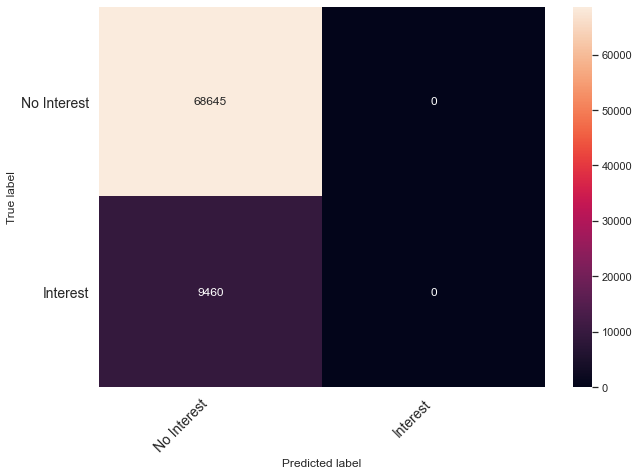

In [82]:
# Confusion matrix testdata

cm = confusion_matrix(y_test,prediction_test)
df_cm = pd.DataFrame(cm, index=['No Interest','Interest'], columns=['No Interest', 'Interest'],)
fig = plt.figure(figsize=[10,7])
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=14)
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [83]:
# metrics of confusion matrix
tn, fp, fn, tp = cm.ravel()
recall = tp/(fn+tp)
precision = tp/(tp+fp)
print("True Negatives: " + str(tn))
print("False Positives: " + str(fp))
print("False Negatives: " + str(fn))
print("True Positives: " + str(tp))
print("Recall: " + str(recall))
print("Precision: " + str(precision))

True Negatives: 68645
False Positives: 0
False Negatives: 9460
True Positives: 0
Recall: 0.0
Precision: nan


The Recall value is too low and therefore offers no representation. To be able to display and evaluate the Precision and Recall values, this requires an improvement with the help of the threshold values. The Recall values are to be increased.

AttributeError: module 'sklearn.metrics' has no attribute 'plot_roc_curve'.
    - If this error occurs, please check the versioning.
    - Unfortunately, error analysis did not bring any success.
    - Due to the massive effort and the risk of data loss, the error was not fixed.

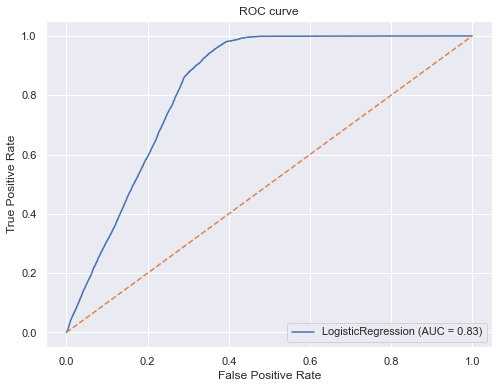

In [84]:
# ROC curve, AUC
fig, ax = plt.subplots(figsize=(8,6))
ax.set_title('ROC curve')
plot = metrics.plot_roc_curve(logistic_model, X_test, y_test, ax=ax);
ax.plot([0,1], [0,1], '--');

## 4.3 Interpretation

First, however, we will illustrate the results for business and clarify which ones arouse a customer's interest and which ones diminish it.

In [85]:
# Read out regression coefficients and thus find out importance of individual attributes
weights = pd.Series(logistic_model.coef_[0],
 index=X_train.columns.values)
weights.sort_values(ascending = False)

Vehicle_Damage_Yes       2.159262
Vehicle_Age_> 2 Years    0.109212
Gender_Male              0.096729
Annual_Premium          -0.024813
Policy_Sales_Channel    -0.072448
Vehicle_Age_< 1 Year    -0.688410
Previously_Insured      -3.936097
dtype: float64

AxesSubplot(0.125,0.125;0.775x0.755)


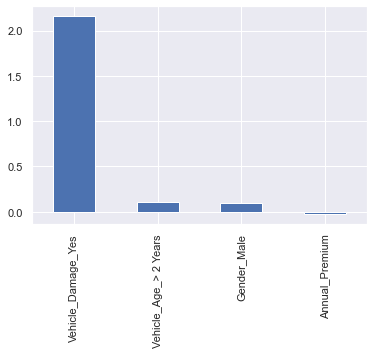

In [86]:
# Graphical presentation of the most important features that increase the interest of an additional motor vehicle insurance:
weights = pd.Series(logistic_model.coef_[0],
                 index=X_train.columns.values)
print (weights.sort_values(ascending = False)[:4].plot(kind='bar'))

The three features that increase the interest of the customer:

- If the customer has already had an accident (Vehicle_Damage_Yes)
- If the customer is of male gender (Gender_Male)
- If the customer's automobile is older than 2 years (Vehicel_Age_>2Years)

AxesSubplot(0.125,0.125;0.775x0.755)


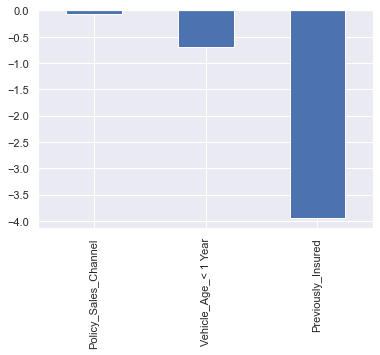

In [87]:
# Most important features that reduce interest
print(weights.sort_values(ascending = False)[-3:].plot(kind='bar'))

The three features that reduce the interest of the customer:

- Sales channel through which the customer is addressed (Policy_Sales_Channel).
- If the car has been owned for less than 1 year (Vehicle_Age_<1Year)
- If the customer already has an insurance policy (Previously_Insured)

## 4.4. Model Optimization

The recall rate is too low as a target metric and must therefore be increased. Therefore, the metrics are analyzed at different thresholds of the logistic regression.

In [89]:
# Testing the metrics at different thresholds
threshold_list = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,.7,.75,.8,.85,.9,.95,.99]
pred_proba_df = y_hat
for i in threshold_list:
    print ('\n******** For a threshold value of {} ******'.format(i))
    # Round up if value is above threshold
    y_test_pred = pred_proba_df.apply(lambda x: 1 if x>i else 0)
    # print metrics
    test_accuracy = metrics.accuracy_score(y_test, y_test_pred)
    print("Accuracy: {}".format(test_accuracy))
    # confusion matrix
    c = confusion_matrix(y_test, y_test_pred)
    tn, fp, fn, tp = c.ravel()
    recall = tp/(fn+tp)
    precision = tp/(tp+fp)
    # print relevant metrics
    print("True Negatives: " + str(tn))
    print("False Positives: " + str(fp))
    print("False Negatives: " + str(fn))
    print("True Positives: " + str(tp))
    print("Recall: " + str(recall))
    print("Precision: " + str(precision))


******** For a threshold value of 0.05 ******
Accuracy: 0.6497023237948915
True Negatives: 41462
False Positives: 27183
False Negatives: 177
True Positives: 9283
Recall: 0.9812896405919662
Precision: 0.25456589699994514

******** For a threshold value of 0.1 ******
Accuracy: 0.6512515203892196
True Negatives: 41587
False Positives: 27058
False Negatives: 181
True Positives: 9279
Recall: 0.9808668076109937
Precision: 0.25535955087101303

******** For a threshold value of 0.15 ******
Accuracy: 0.6876640419947506
True Negatives: 44877
False Positives: 23768
False Negatives: 627
True Positives: 8833
Recall: 0.9337209302325581
Precision: 0.2709426091224196

******** For a threshold value of 0.2 ******
Accuracy: 0.7325523333973497
True Negatives: 49380
False Positives: 19265
False Negatives: 1624
True Positives: 7836
Recall: 0.8283298097251586
Precision: 0.28914062211726504

******** For a threshold value of 0.25 ******
Accuracy: 0.733781448050701
True Negatives: 49540
False Positives: 1910

A threshold of 0.25 offers a better result for the application. It increases the recall to a satisfactory level of 73.37% at the expense of the precision. However, the precision is negligible.

This results in the following values:

              precision    recall  f1-score   support

           0       0.97      0.72      0.83     68645
           1       0.29      0.82      0.43      9460

    accuracy                           0.73     78105
   macro avg       0.63      0.77      0.63     78105
weighted avg       0.88      0.73      0.78     78105

confusion matrix with new threshold:


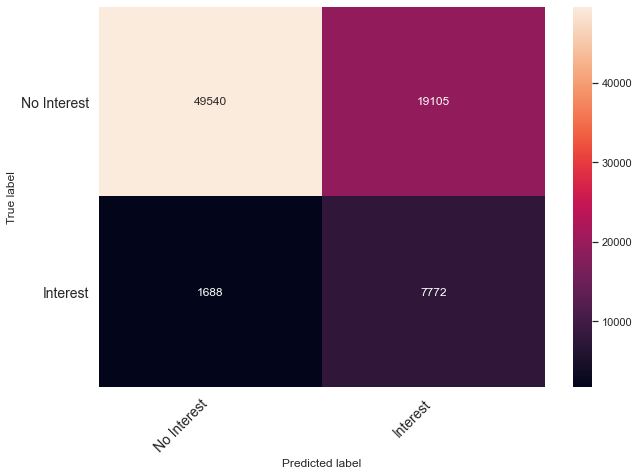

 
Metrics for the new threshold:
Accuracy: 0.733781448050701
True Negatives: 49540
False Positives: 19105
False Negatives: 1688
True Positives: 7772
Recall: 0.8215644820295983
Precision: 0.28916917810767573


In [90]:
# Threshold of 0.25 see above
y_test_pred = pred_proba_df.apply(lambda x: 1 if x>0.25 else 0)
test_accuracy = metrics.accuracy_score(y_test, y_test_pred)
c = confusion_matrix(y_test, y_test_pred)
# Read values from confusion matrix
tn, fp, fn, tp = c.ravel()
recall = tp/(fn+tp)
precision = tp/(tp+fp)
print(classification_report(y_test,y_test_pred))
# create confusion matrix
print("confusion matrix with new threshold:")
df_cm = pd.DataFrame(c, index=['No Interest','Interest'], columns=['No Interest', 'Interest'],)
fig = plt.figure(figsize=[10,7])
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=14)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
print(" ")
# print metrics
print("Metrics for the new threshold:")
print("Accuracy: {}".format(test_accuracy))
print("True Negatives: " + str(tn))
print("False Positives: " + str(fp))
print("False Negatives: " + str(fn))
print("True Positives: " + str(tp))
print("Recall: " + str(recall))
print("Precision: " + str(precision))

As expected, the rate of customers incorrectly classified as interest increases. In turn, however, the number of customers who are correctly predicted as churn (true positives) also increases. As elaborated in the term paper, this is essential, because in case of doubt, a customer would be falsely called by service team and even perceive this call as good service and be bound to the company in the longer term.



# 5. Deployment

In [91]:
# Separate individual (scaled) customer
customer_df = X_test.iloc[42357]

In [92]:
# Overview of selected customers
customer_df

Previously_Insured       0.000000
Annual_Premium          -0.424768
Policy_Sales_Channel    -1.593290
Gender_Male              1.000000
Vehicle_Age_< 1 Year     0.000000
Vehicle_Age_> 2 Years    1.000000
Vehicle_Damage_Yes       1.000000
Name: 128831, dtype: float64

In [93]:
# Run Prediction
cust_pred = logistic_model.predict([customer_df])

In [95]:
# Interpret result
def check_prediction(pred):
    if pred[0] == 1:
        print("The customer is probably interested! Inform Customer Relationship Management!")
    else:
        print("The customer is probably not interested.")

In [96]:
check_prediction(cust_pred)

The customer is probably not interested.
